In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Wine.csv')

In [3]:
df.columns = ['Class'] + 'Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline'.split(',')

In [5]:
X=df.drop('Class',axis=1)
y=df['Class']

In [6]:
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    X = X.fillna(X.median())

In [15]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []


In [11]:

print("\n=== KNN Performance ===")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"K={k:<2} | Accuracy: {accuracy:.3f}")



=== KNN Performance ===
K=1  | Accuracy: 0.778
K=3  | Accuracy: 0.806
K=5  | Accuracy: 0.722
K=7  | Accuracy: 0.694
K=9  | Accuracy: 0.722
K=11 | Accuracy: 0.750
K=13 | Accuracy: 0.722
K=15 | Accuracy: 0.750


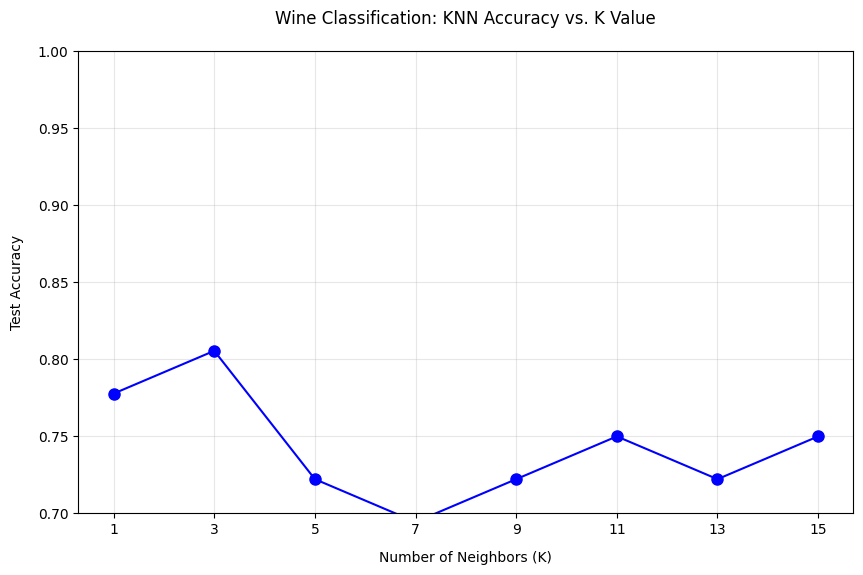

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', markersize=8)
plt.title('Wine Classification: KNN Accuracy vs. K Value', pad=20)
plt.xlabel('Number of Neighbors (K)', labelpad=10)
plt.ylabel('Test Accuracy', labelpad=10)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.ylim(0.7, 1.0)
plt.show()


In [13]:

best_k = k_values[np.argmax(accuracies)]
print(f"\n=== Optimal K ===")
print(f"Best K: {best_k} with accuracy {max(accuracies):.3f}")
print("\nWhy this K performs best:")
print(f"- Peak accuracy achieved at K={best_k}")
print("- Balances model complexity and generalization")
print("- Odd K prevents voting ties in 3-class problem")



=== Optimal K ===
Best K: 3 with accuracy 0.806

Why this K performs best:
- Peak accuracy achieved at K=3
- Balances model complexity and generalization
- Odd K prevents voting ties in 3-class problem


In [16]:

print("\n=== Top Predictive Features ===")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_scaled, y)
distances, indices = knn_best.kneighbors(X_scaled)
importance = np.mean(np.std(X_scaled[indices], axis=1), axis=0)
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance.head(5))


=== Top Predictive Features ===
Alcalinity of ash       0.337239
Ash                     0.335256
Alcohol                 0.324376
Magnesium               0.321823
Nonflavanoid phenols    0.304867
dtype: float64
